# Data Labeler

Hand-label images using the [pigeon library](https://github.com/agermanidis/pigeon) and save the results as a CSV. The entire breed should be annotated in one sitting.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os, glob, cv2

# pip install pigeon-jupyter
from pigeon import annotate
from IPython.display import display, Image

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
# data directory above `images` and `labels`
VOL = '../../data'

# specific breed to annotate. valid range is 0 - 119
TARGET = 25


def verify_and_plot(df, images):
    """Visualize the images and their associated labels.
    
    :params
    ---
    df : pd.DataFrame
        dataframe of identifiers and labels
    images : list
        list of pathnames to files
    """
    h, w = 4, 4
    dsize = (224, 244)
    fig, axs = plt.subplots(h, w, figsize=(10, 10))
    axs = axs.ravel()
    for i in range(h*w):
        im = cv2.cvtColor(cv2.imread(images[i]), cv2.COLOR_BGR2RGB) # BGR -> RGB
        im = cv2.resize(im, dsize)
        axs[i].imshow(im)
        try:
            label = df.iloc[i]['label']
        except:
            label = 'missing...'
        axs[i].set_title(label)
        axs[i].set_xticks([]); axs[i].set_yticks([]); axs[i].grid(False)

### Initialization

In [10]:
breeds = glob.glob(os.path.join(VOL, 'Images/*'))
images = glob.glob(os.path.join(breeds[TARGET], '*'))
target_breed = breeds[TARGET].split('/')[-1]

output_dir = os.path.join(VOL, 'labels')
os.makedirs(output_dir, exist_ok=True)
output_csv = os.path.join(output_dir, target_breed + '.csv')

print(f'Target {TARGET} is set to annotate: {target_breed}')

Target 25 is set to annotate: n02097209-standard_schnauzer


### Annotation

In [11]:
annotations = annotate(
  images,
  options=['standing', 'sitting', 'lying', 'undefined'],
  display_fn=lambda filename: display(Image(filename))
)

HTML(value='0 examples annotated, 156 examples left')

Output()

Annotation done.


### Convert Identifiers and Verify

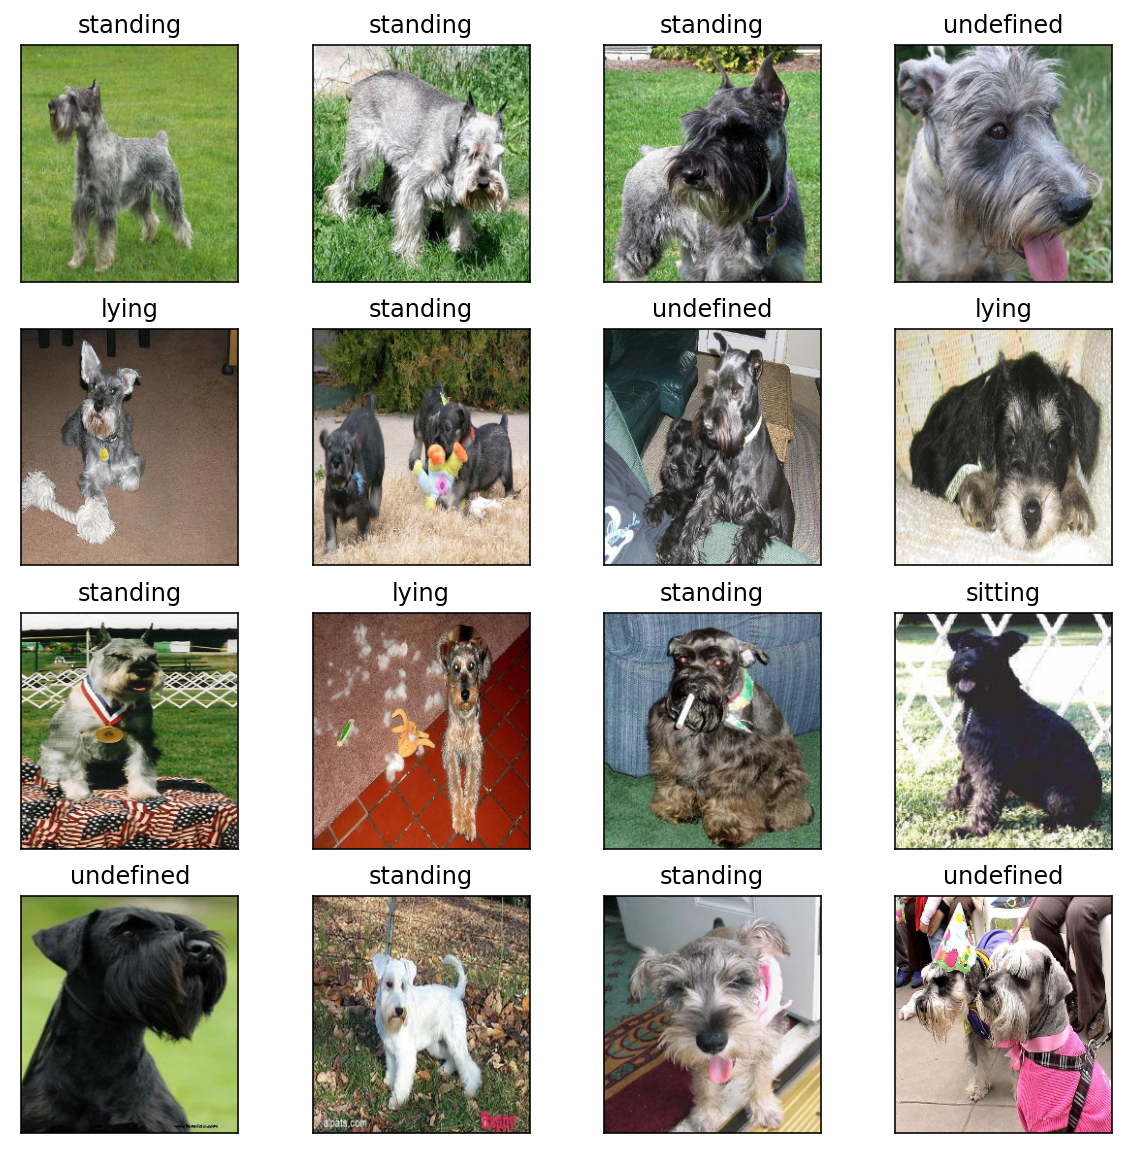

In [12]:
df = pd.DataFrame(annotations, columns=['id', 'label'])
df['id'] = df['id'].str.split('/').str[-1]
verify_and_plot(df, images)

### Save Labels

In [13]:
print(f'Saving {len(df)}/{len(images)} annotations to {output_csv}\n')
df.to_csv(output_csv, index=False)
!cat {output_csv} | head -5
print('...')

Saving 155/155 annotations to ../../data/labels/n02097209-standard_schnauzer.csv

id,label
n02097209_3543.jpg,standing
n02097209_1.jpg,standing
n02097209_2477.jpg,standing
n02097209_737.jpg,undefined
...
